In [1]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

# DANE

In [44]:
cena_poczatkowa = 120000  # mieszkania
stopa_wzrostu = 0.05  # % w skali roku
lata = 5  # okres inwestycji
stopa_lokaty = 0.12  # oprocentowanie w skali roku
kapitalizacja = 12  # liczba w roku
kwota_wplaty = npf.pmt(stopa_lokaty/kapitalizacja, lata*kapitalizacja, 0, cena_poczatkowa*(1+stopa_wzrostu)**(lata))

# OBLICZENIE CENY MIESZKANIA ZA 5 LAT

In [45]:
cena_po_latach = cena_poczatkowa * (1 + stopa_wzrostu)**lata
print(f"Orientacyjna cena mieszkania po {lata} latach: {cena_po_latach:.2f} zł")

Orientacyjna cena mieszkania po 5 latach: 153153.79 zł


# OBLICZENIE KWOTY MIESIĘCZNEJ WPŁATY NA LOKATE

In [51]:
liczba_miesiecy = lata * kapitalizacja
tmprata = npf.pmt(stopa_lokaty/kapitalizacja, liczba_miesiecy, 0, cena_po_latach)
rata = -1 * tmprata
print(f"Aby uzbierać na mieszkanie w ciągu {lata} lat, musisz wpłacać {rata:.2f} zł miesięcznie na lokatę bankową")

Aby uzbierać na mieszkanie w ciągu 5 lat, musisz wpłacać 1875.28 zł miesięcznie na lokatę bankową


# WYKRES

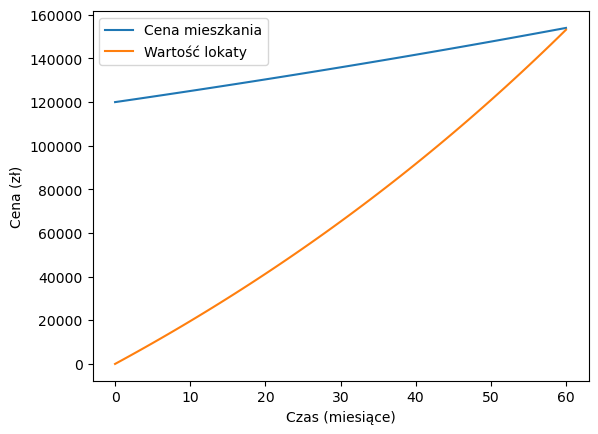

In [68]:
czas = np.arange(0, liczba_miesiecy+1)
cena_mieszkania = [cena_poczatkowa * (1 + stopa_wzrostu/12)**(t) for t in czas]
wartosci_lokaty = npf.fv(stopa_lokaty/kapitalizacja, czas, -rata, 0)

plt.plot(czas, cena_mieszkania, label="Cena mieszkania")
plt.plot(czas, wartosci_lokaty, label="Wartość lokaty")
plt.xlabel("Czas (miesiące)")
plt.ylabel("Cena (zł)")
plt.legend()
plt.show()
